In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing and pre-processing data

In [2]:
df = pd.read_csv("../data/Movie_regression.csv", header = 0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Missing value imputation

In [5]:
# time taken variable has missing values in it

In [6]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

C:\Users\chsan\AppData\Local\Temp\ipykernel_11864\720848667.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)


In [7]:
df.info()
# see that there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Dummy variable creation

In [8]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [9]:
# there are 2 categorical variables
# 1) 3D_available
# 2) Genre

In [10]:
df = pd.get_dummies(df, columns = ['3D_available', "Genre"], drop_first = True) # drop_first = True will drop the extra dummy variable

In [11]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,False,True,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [13]:
# Convert boolean columns to integer
df = df.astype({col: 'int64' for col in df.select_dtypes(include='bool').columns})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

# X-y split

In [15]:
# target variable is collection variable

In [16]:
X = df.loc[:, df.columns != "Collection"]

In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
X.shape

(506, 19)

In [19]:
y = df['Collection']

In [20]:
type(y)

pandas.core.series.Series

In [21]:
y.shape

(506,)

In [22]:
y

0      48000
1      43200
2      69400
3      66800
4      72400
       ...  
501    44800
502    41200
503    47800
504    44000
505    38000
Name: Collection, Length: 506, dtype: int64

In [23]:
X

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,1,1,0,0


In [24]:
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,44800,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,41200,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,47800,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,44000,1,1,0,0


# Test train split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 19), (102, 19), (404,), (102,))

In [28]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,1,0,0,0


# Training Regression tree

In [29]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [30]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [31]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

### Model performance

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# on test set

In [34]:
mean_squared_error(y_test, y_test_pred)

99983788.27972667

In [35]:
r2_score(y_test, y_test_pred)

0.6894186462226066

In [36]:
# On training set

In [37]:
mean_squared_error(y_train, y_train_pred)

55636391.90989135

In [38]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [39]:
# r2_score = 1 (nice fit)
# r2_score = 0 (no fit)

### plotting decision tree

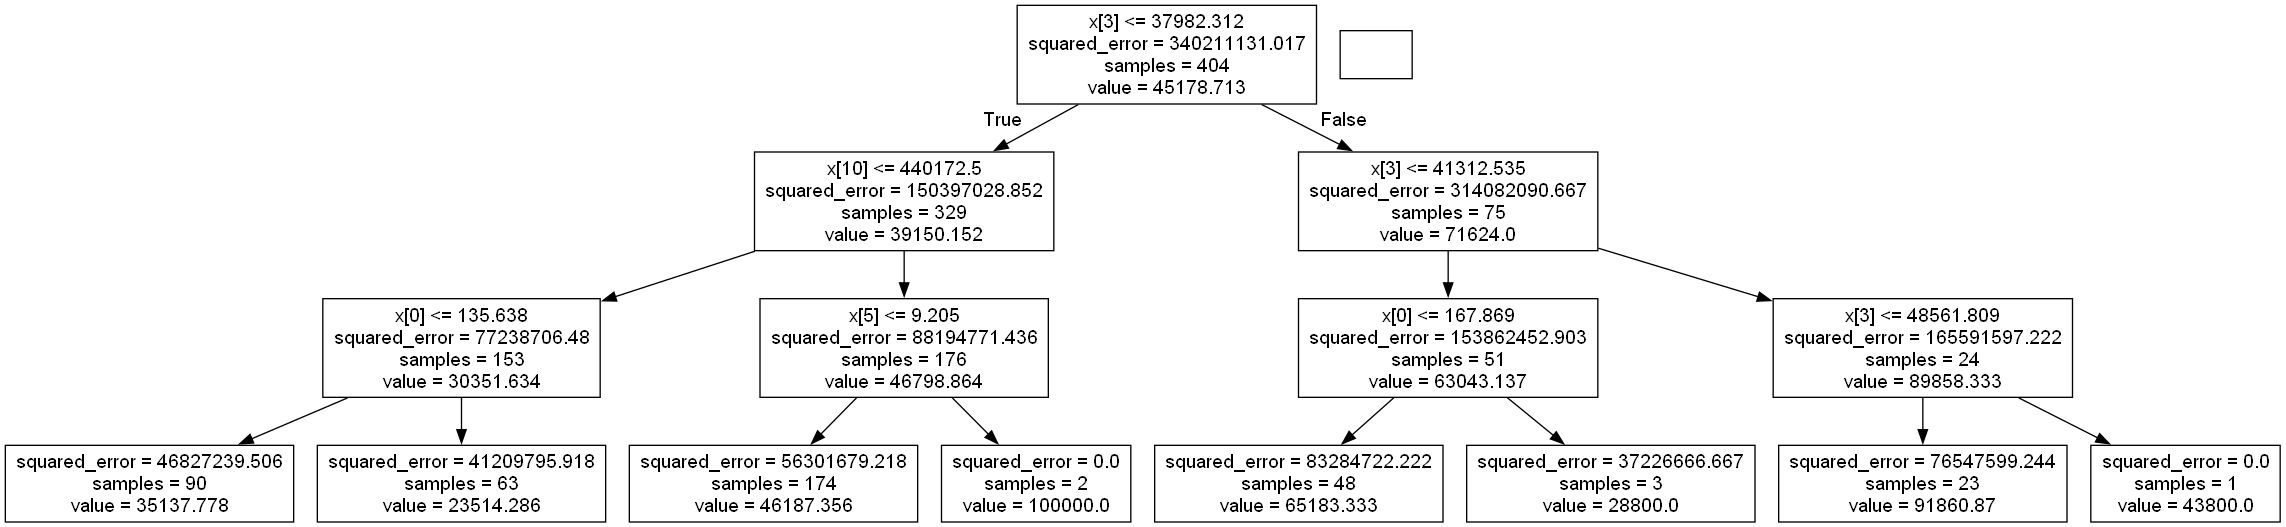

In [40]:
dot_data = tree.export_graphviz(regtree, out_file = None)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [41]:
# got error while plotting decision tree



# Controlling tree growth

### Maximum number of levels in tree

In [42]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(X_train, y_train)
y_test_pred = regtree1.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.6894186462226066


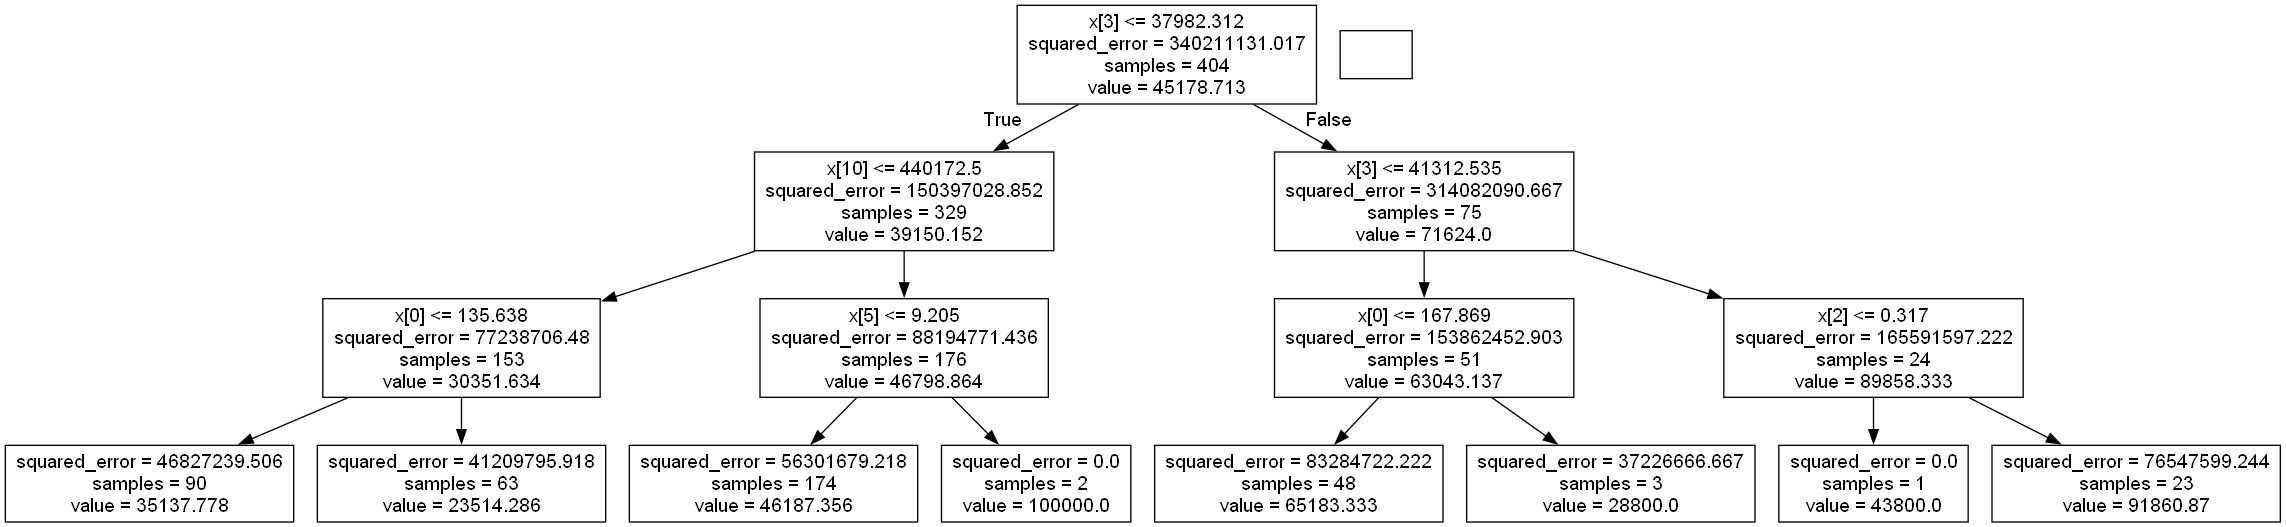

In [43]:
dot_data = tree.export_graphviz(regtree1, out_file = None)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Minimum observations at internal node

In [44]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 3)
regtree2.fit(X_train, y_train)
y_test_pred = regtree2.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.5249999531245878


In [45]:
dot_data = tree.export_graphviz(regtree2, out_file = None)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Minimum observations at leaf node

In [46]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(X_train, y_train)
y_test_pred = regtree3.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.6232009891360868


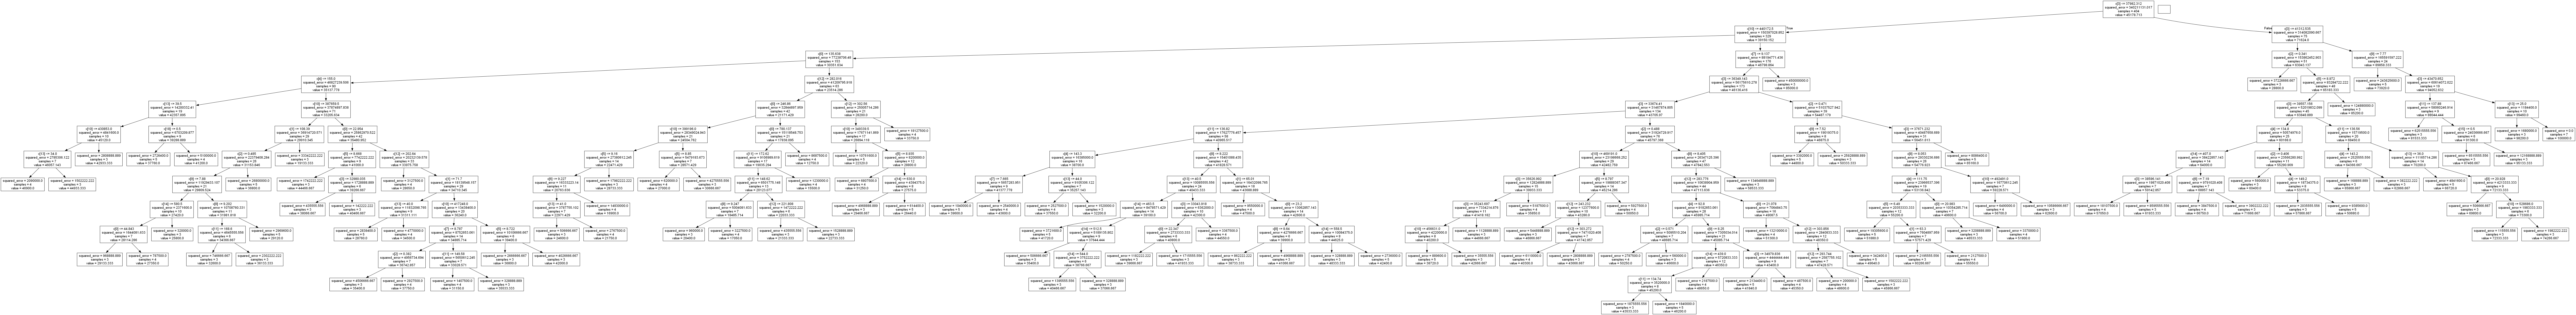

In [47]:
dot_data = tree.export_graphviz(regtree3, out_file = None)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Combining restrictions

In [48]:
regtree4 = tree.DecisionTreeRegressor(min_samples_leaf = 3, max_depth = 4)
regtree4.fit(X_train, y_train)
y_test_pred = regtree4.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.6225304923128427


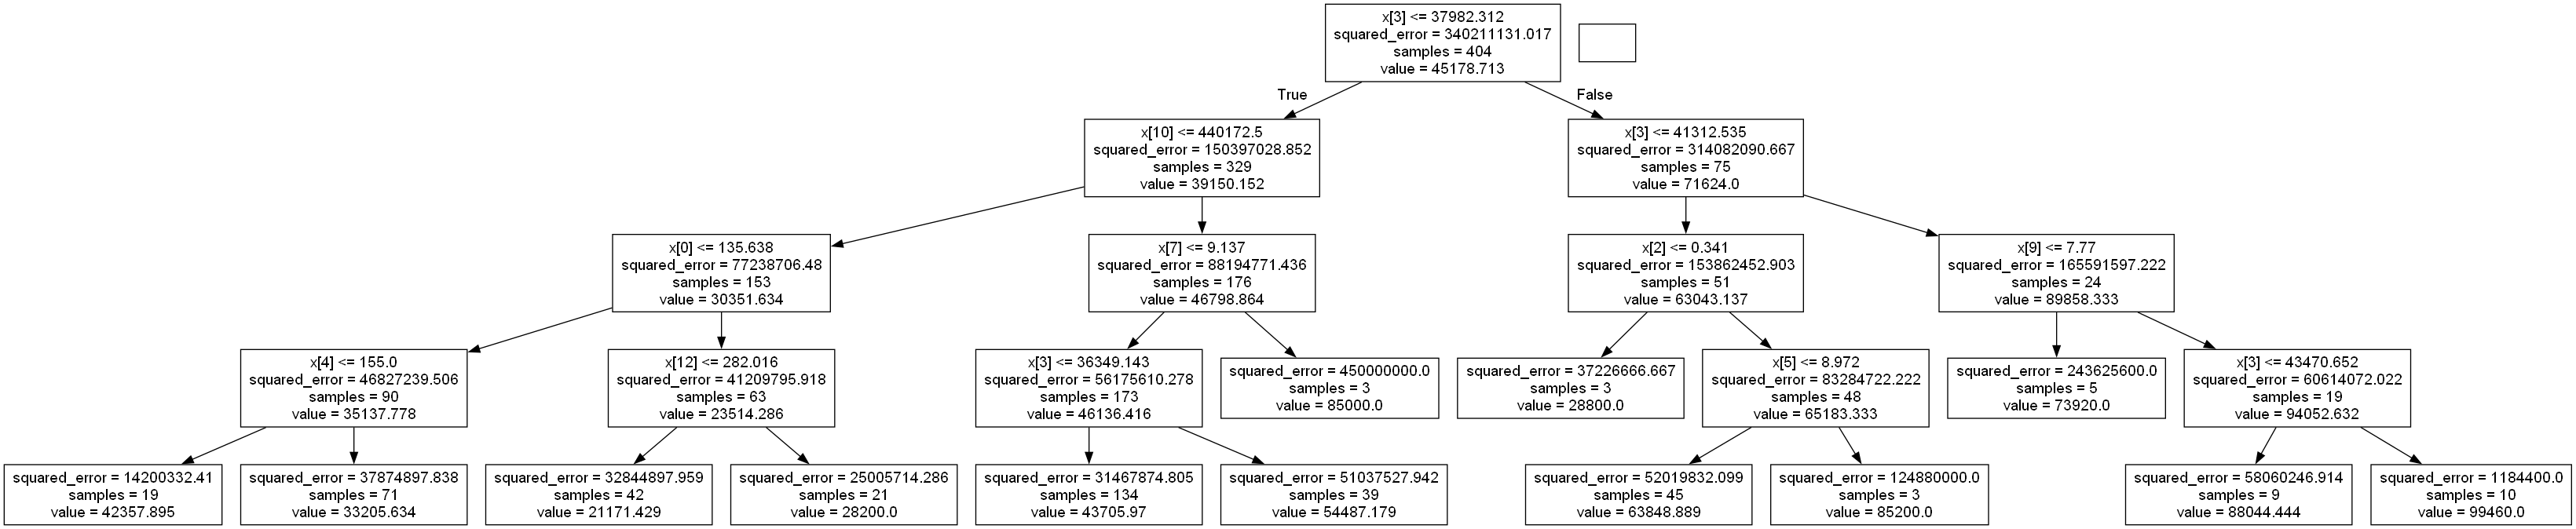

In [49]:
dot_data = tree.export_graphviz(regtree4, out_file = None)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())